**🚀 Linear Regression Implementation from Scratch**

In [68]:
class LinearRegression:
    def __init__(self):
        self.m = None  # Slope
        self.b = None  # Intercept

    def fit(self, X_train, Y_train):
        num = den = 0
        X_mean, Y_mean = X_train.mean(), Y_train.mean()
        
        for i in range(len(X_train)):
            num = ((X_train - X_mean) * (Y_train - Y_mean)).sum()
            den = ((X_train - X_mean) ** 2).sum()
        
        self.m = num / den
        self.b = Y_mean - self.m * X_mean
        print(f"Slope (m): {self.m:.2f}, Intercept (b): {self.b:.2f}")

    def predict(self, X_test):
        return self.m * X_test + self.b

**Explanation:**
**Created a LinearRegression class to hold our model parameters (slope m and intercept b).**
**Computes the optimal slope and intercept using the least squares method.**
**Manually implements the covariance/variance calculation.**
**Applies the linear equation y = mx + b to generate predictions for new data points.**

**📊 Loading and Preparing Data**

In [69]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv("placement.csv")

In [71]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [72]:
df.shape

(200, 2)

In [73]:
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 18)

In [76]:
model = LinearRegression()

In [77]:
model.fit(X_train, Y_train)

Slope (m): 0.59, Intercept (b): -1.12


**Interpretation:**
**For every 1-point CGPA increase, package increases by ~0.59 LPA.**
**Negative intercept suggests non-linear effects at lower CGPAs.**

In [78]:
predictions = model.predict(X_test)

**📈 Visualization**

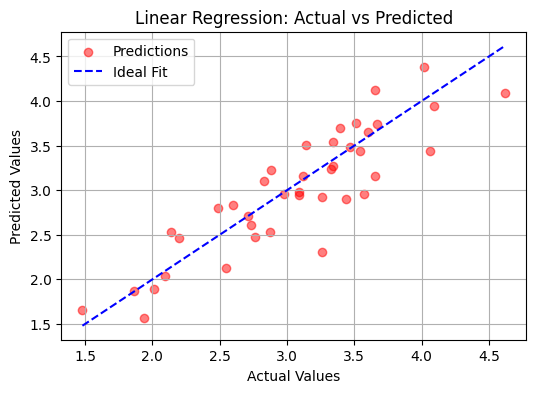

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

# Calculate min and max values for the perfect fit line
min_val = min(np.min(Y_test), np.min(predictions))
max_val = max(np.max(Y_test), np.max(predictions))

# Plot results
plt.scatter(Y_test, predictions, color='red', alpha=0.5, label='Predictions')
plt.plot([min_val, max_val], [min_val, max_val], 'b--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

**Key Insights:**
**Red dots show predicted vs actual salaries.**
**Blue dashed line represents perfect predictions.**